In [1]:
import pandas as pd
import fitz
import cv2
from io import BytesIO
from PIL import Image
import base64
from openai import OpenAI
from pydantic import BaseModel
import json
import numpy as np
import traceback
from typing import Optional

import pandas as pd
from openpyxl import Workbook
from openpyxl.utils.dataframe import dataframe_to_rows
from openpyxl.styles import Alignment, Border, Side, Font

from blank_functions.form_class import Form

from blank_functions.ui_functions import get_pic_from_pdf, save_to_excel, get_correct_answers, postprocess_raw_output, check_answers, final_styling, extract_text_from_image, transform_json_to_dataframe
from blank_functions.ui_functions import promt

# no limit columns for pandas
pd.set_option('display.max_columns', None)


In [2]:
parsed_json_temp = {'subject_name': 'МАТЕМАТИКА',
 'participant_code': 1235,
 'version_number': 2,
 'answer_1': -275,
 'answer_2': 37.5,
 'answer_3': 14,
 'answer_4': 3478,
 'answer_5': 24.5,
 'answer_6': 104,
 'answer_7': -3,
 'answer_8': 0.5,
 'answer_9': 17.5,
 'answer_10': -0.75,
 'correction_1': None,
 'correction_2': None,
 'correction_3': None,
 'correction_4': None,
 'correction_5': None,
 'correction_6': 102,
 'correction_7': None,
 'correction_8': -0.5,
 'correction_9': None,
 'correction_10': None}

In [3]:
import time
#
# C:\Users\zamko\Documents\mom_project\repo\data
pdf_path = "C:/Users/zamko/Documents/mom_project/repo/data/valid_format/valid_questions.pdf"
pdf_bytes = open(pdf_path, 'rb').read()
pdf_document = fitz.open(stream=pdf_bytes, filetype="pdf")
num_pages = pdf_document.page_count

answers_path = "C:/Users/zamko/Documents/mom_project/repo/data/answers.xlsx"
answers_bytes = open(answers_path, 'rb').read()
answers = pd.read_excel(answers_bytes)

df_global = pd.DataFrame()
form_dict = {}
for i in range(0, 2):
# for i in [0]:
    start_time = time.time()
    cur_pic = get_pic_from_pdf(pdf_bytes, i, zoom=6.0)
    time_1 = time.time()
    # cur_pic = cv2.imread("test_pics/valid_format/page-{}.jpg".format(i))
    form = Form()
    time_2 = time.time()
    form = form.run_pipeline(
        image = cur_pic,
        template_path = "C:/Users/zamko/Documents/mom_project/repo/data/template_2.jpg",
        json_path = "C:/Users/zamko/Documents/mom_project/repo/data/rows_data.json",
        answers = answers)  
    # form_dict[i] = form
    cur_pic_adjusted = form.image
    # cur_pic_adjusted = cur_pic.copy()
    # answer_minus_list = form.answer_minus_list
    # correction_minus_list = form.correction_minus_list
    parsed_json = parsed_json_temp
    # parsed_json = extract_text_from_image(api_key, cur_pic_adjusted, promt)
    time_3 = time.time()
    df_current = transform_json_to_dataframe(parsed_json, 0, 0)
    time_4 = time.time()
    df_global = pd.concat([df_global, df_current]).reset_index(drop=True)
    time_5 = time.time()
# correct_answers = get_correct_answers(answers_bytes)
# df_global_processed = postprocess_raw_output(df_global, correct_answers)
# df_global_answers = check_answers(df_global_processed)
# df_global_styled = final_styling(df_global_answers)
# temp_df = pd.DataFrame([['Предмет', 'Код участника', 'Вариант', "Задание 1", "Картинка ответа 1", "Задание 2", "Картинка ответа 2", "Задание 3", "Картинка ответа 3", "Задание 4", "Картинка ответа 4", "Задание 5", "Картинка ответа 5", "Задание 6", "Картинка ответа 6", "Задание 7", "Картинка ответа 7", "Задание 8", "Картинка ответа 8", "Задание 9", "Картинка ответа 9", "Задание 10", "Картинка ответа 10", 0.5, 1, 1, 1, 1, 1, 1, 1, 1, 1.5, 10]], columns=df_global_styled.columns)
# temp_df.columns = df_global_styled.columns
# df_global_styled = pd.concat([temp_df, df_global_styled], ignore_index=True)

# excel_data = save_to_excel(df_global_styled)

C:\Users\zamko\AppData\Local\Temp\ipykernel_22568\1852946124.py:11: FutureWarning: Passing bytes to 'read_excel' is deprecated and will be removed in a future version. To read from a byte string, wrap it in a `BytesIO` object.
  answers = pd.read_excel(answers_bytes)


968
Время выполнения 1: 0.28 секунд
Время выполнения 2: 0.01 секунд
Время выполнения 3: 0.00 секунд
Время выполнения 4: 0.24 секунд
Время выполнения 5: 0.02 секунд
Время выполнения 6: 0.00 секунд
Время выполнения 7: 0.00 секунд
Время выполнения 8: 0.00 секунд
1032
Время выполнения 1: 0.28 секунд
Время выполнения 2: 0.01 секунд
Время выполнения 3: 0.00 секунд
Время выполнения 4: 0.24 секунд
Время выполнения 5: 0.02 секунд
Время выполнения 6: 0.00 секунд
Время выполнения 7: 0.00 секунд
Время выполнения 8: 0.00 секунд


In [5]:
cur_pic.shape

(5052, 3570)

In [7]:
cur_pic[5052:5100, 3500:3600]


array([], shape=(0, 70), dtype=uint8)

In [5]:
5*3000/60/60

4.166666666666667

In [10]:

df_global

,Предмет,Код участника,Вариант,Задание 1,Задание 2,Задание 3,Задание 4,Задание 5,Задание 6,Задание 7,Задание 8,Задание 9,Задание 10,Замена 1,Замена 2,Замена 3,Замена 4,Замена 5,Замена 6,Замена 7,Замена 8,Замена 9,Замена 10
0,МАТЕМАТИКА,1235,1,275.0,37.5,14.0,3478.0,24.50,104.0,-3.0,0.50,17.50,-0.75,NaN,NaN,None,None,NaN,102.0,NaN,-0.5,None,NaN
1,МАТЕМАТИКА,1317,2,-245.0,39.5,14.0,3562.0,24.50,102.0,3.0,-0.05,NaN,NaN,NaN,NaN,None,None,NaN,NaN,-3.0,NaN,None,NaN
2,МАТЕМАТИКА,1278,2,-235.0,37.5,14.0,3508.0,24.05,102.0,3.0,-0.50,18.00,-1.00,NaN,NaN,None,None,NaN,NaN,NaN,NaN,None,NaN
3,МАТЕМАТИКА,1256,2,-273.0,37.0,24.0,3478.0,24.50,102.0,3.0,-0.55,18.00,NaN,NaN,NaN,None,None,NaN,NaN,-3.0,NaN,None,NaN
4,МАТЕМАТИКА,1278,2,235.0,37.5,14.0,3508.0,24.05,102.0,3.0,0.50,1.80,-1.00,NaN,NaN,None,None,NaN,NaN,NaN,NaN,None,NaN
5,МАТЕМАТИКА,1251,2,275.0,37.5,14.0,3479.0,24.50,103.0,-3.0,-1.00,17.50,-0.26,NaN,NaN,None,None,NaN,NaN,NaN,NaN,None,-0.25
6,МАТЕМАТИКА,1263,2,275.0,38.0,14.0,3478.0,25.00,NaN,-3.0,0.50,NaN,NaN,NaN,37.5,None,None,24.5,NaN,NaN,NaN,None,NaN
7,МАТЕМАТИКА,1285,2,275.0,38.0,14.0,3478.0,102.00,3.0,0.5,18.00,NaN,NaN,-275.0,NaN,None,None,NaN,NaN,-3.0,NaN,None,NaN
8,МАТЕМАТИКА,1299,2,-275.0,37.0,15.0,3478.0,23.00,102.0,3.0,-0.50,17.00,0.25,NaN,NaN,None,None,24.5,NaN,-3.0,NaN,None,NaN
9,МАТЕМАТИКА,1306,2,-280.0,37.5,13.0,3479.0,24.05,102.0,-3.0,0.50,18.15,NaN,NaN,NaN,None,None,24.5,NaN,NaN,NaN,None,NaN


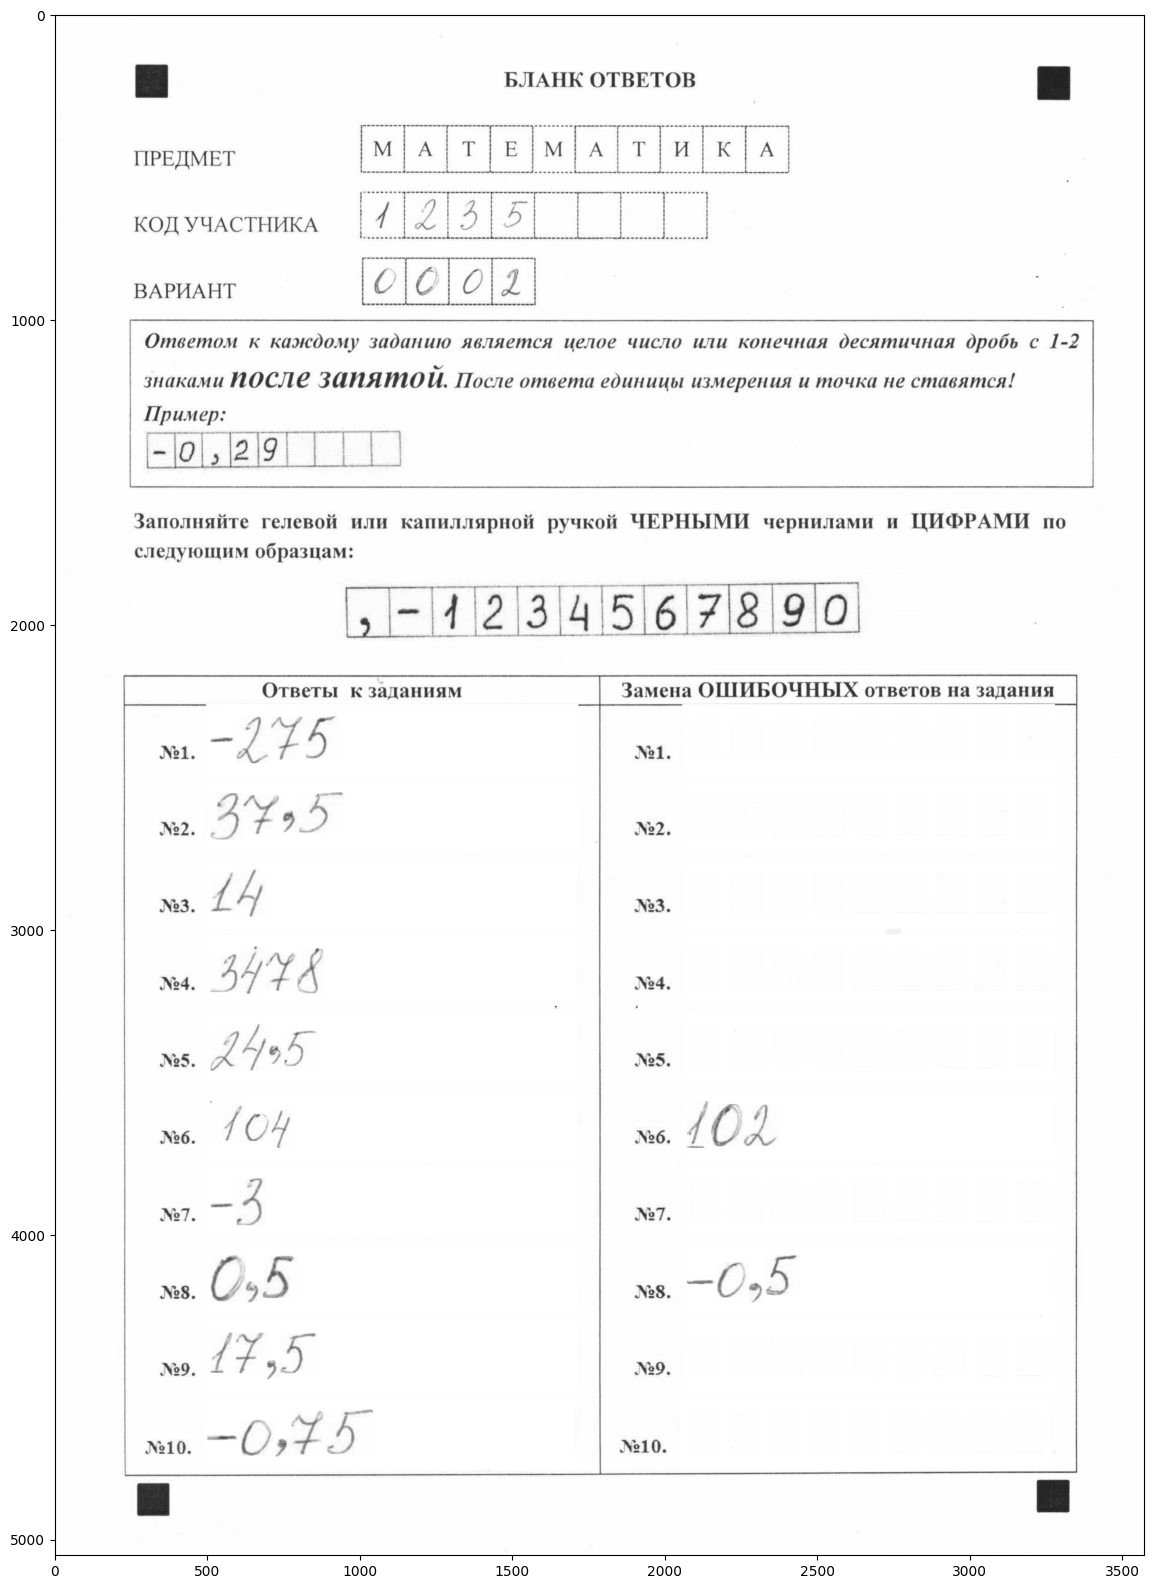

KeyError: 1

<Figure size 4000x2000 with 0 Axes>

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
for i in range(0, 11):
    # form_dict[i].image = cv2.cvtColor(form_dict[i].image, cv2.COLOR_GRAY2BGR)  
    # for j in range(1, 11):
    #     for answer_name in [f"answer{j}", f"correction{j}"]:
    #         # print(answer_name)
    #         answer_obj = getattr(form_dict[i], answer_name)
    #         for cell in answer_obj.cells:
    #             # print(cell.cell_image.shape)
    #             x, y, w, h = cell.x, cell.y, cell.w, cell.h
    #             # make it yellow      
    #             cv2.rectangle(form_dict[i].image, (x, y), (x + w, y + h), (0, 255, 0), 2)



    plt.figure(figsize=(40, 20))
    plt.imshow(cv2.cvtColor(form_dict[i].image, cv2.COLOR_BGR2RGB))
    plt.show()





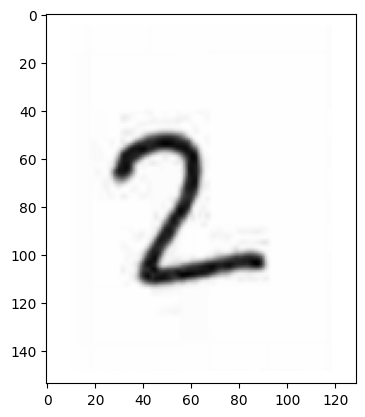

In [12]:
plt.imshow(form_dict[1].answer1.cells[1].cell_image, cmap='gray')
plt.show()

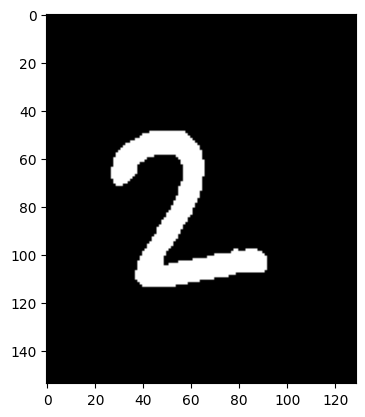

In [13]:
img = form_dict[1].answer1.cells[1].cell_image.copy()
_, thresh = cv2.threshold(img, 230, 255, cv2.THRESH_BINARY_INV)
plt.imshow(thresh, cmap='gray')
plt.show()


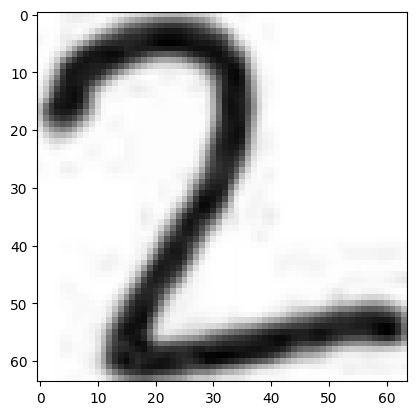

In [17]:
thresh

# calculate min x which is not 0
x_min = np.min(np.where(thresh != 0)[1])
y_min = np.min(np.where(thresh != 0)[0])
x_max = np.max(np.where(thresh != 0)[1])
y_max = np.max(np.where(thresh != 0)[0])

img_2 = img[y_min:y_max, x_min:x_max]

plt.imshow(img_2, cmap='gray')
plt.show()



In [16]:
x_min

27

In [8]:
form_dict[i].image.shape


(5051, 3571, 3)

TypeError: Image data of dtype object cannot be converted to float

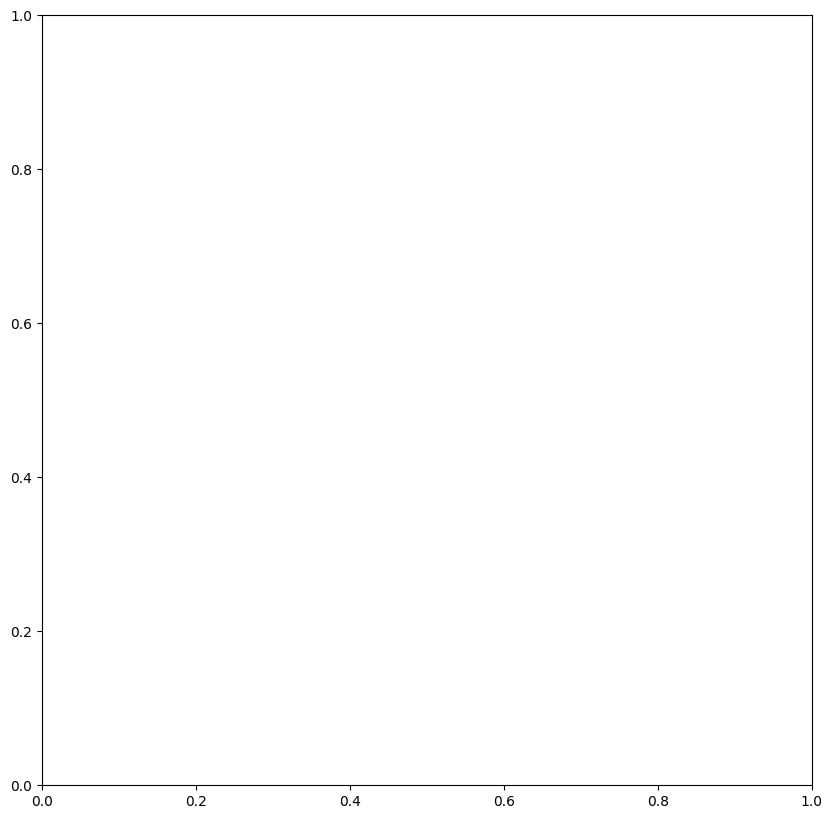

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
for i in range(0, 11):
    for j in range(1, 11):
        for answer_name in [f"answer{j}", f"correction{j}"]:
            # print(answer_name)
            answer_obj = getattr(form_dict[i], answer_name)
            for cell in answer_obj.cells:
                plt.figure(figsize=(20, 10))
                imgplot = plt.imshow(cell.cell_image, cmap='gray')
                plt.show()



In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(10, 8))
imgplot = plt.imshow(form.image, cmap='gray')
plt.show()


In [1]:
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg
# x_min = 100
# y_min = 100
# w_min = 100
# h_min = 100
# for i in range(0, 11):
#     for j in range(1, 11):
#         for answer_name in [f"answer{j}", f"correction{j}"]:
#             # print(answer_name)
#             answer_obj = getattr(form_dict[i], answer_name)
#             for cell in answer_obj.cells:
#                 # print(cell.cell_image.shape)
#                 for symbol in cell.symbols:
#                     if symbol.symbol_image is not None:
#                         print(symbol.symbol_image.shape)
#                         plt.figure(figsize=(1, 1))
#                         imgplot = plt.imshow(symbol.symbol_image, cmap='gray')
#                         plt.show()
#                         # x, y, w, h = symbol.x, symbol.y, symbol.w, symbol.h
#                         # if x is not None and y is not None and w is not None and h is not None:
#                         #     if x < x_min:
#                         #         x_min = x
#                         #     if y < y_min:
#                         #         y_min = y
#                         #     if w < w_min:
#                         #         w_min = w
#                         #     if h < h_min:
#                         #         h_min = h



In [9]:
h_min

7

In [ ]:
# df_global_styled[['Код участника', 'Задание 1', 'Задание 2', 'Задание 3', 'Задание 4', 'Задание 5', 'Задание 6', 'Задание 7', 'Задание 8', 'Задание 9', 'Задание 10','Начисленные баллы сумма']]

In [ ]:
# Запятые
# Плохая семерка


In [ ]:


def get_pic_from_pdf(pdf_stream, index, zoom=4.0):
    """
    Получает изображение страницы из PDF с высоким качеством
    :param pdf_stream: поток PDF файла
    :param index: индекс страницы
    :param zoom: коэффициент увеличения (по умолчанию 4.0 для ~600 DPI)
    :return: изображение в формате NumPy (серое)
    """
    # Открываем PDF из байтового потока
    pdf_document = fitz.open(stream=pdf_stream, filetype="pdf")
    page = pdf_document.load_page(index)  # Загружаем страницу

    # Матрица для увеличения качества (увеличение DPI)
    mat = fitz.Matrix(zoom, zoom)
    
    # Преобразуем страницу в изображение
    pix = page.get_pixmap(matrix=mat, colorspace=fitz.csRGB)  # Улучшенное цветовое пространство
    
    # Конвертируем Pixmap в Pillow Image
    img = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)
    
    img_gray = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2GRAY)
    # Опционально: сохраняем в PNG для максимального качества перед конвертацией
    img.save("temp_output.png", format="PNG")

    # # Конвертируем в оттенки серого с максимальным качеством
    # img_gray = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2GRAY)

    return img_gray


pdf_path = "test_pics/valid_format/valid_questions.pdf"
pdf_bytes = open(pdf_path, 'rb').read()
pdf_document = fitz.open(stream=pdf_bytes, filetype="pdf")
num_pages = pdf_document.page_count

answers_path = "test_pics/answers.xlsx"
answers_bytes = open(answers_path, 'rb').read()
answers = pd.read_excel(answers_bytes)

df_global = pd.DataFrame()
form_dict = {}
i = 9
cur_pic = get_pic_from_pdf(pdf_bytes, i, zoom=6.0)

C:\Users\zamko\AppData\Local\Temp\ipykernel_13528\4221779031.py:38: FutureWarning: Passing bytes to 'read_excel' is deprecated and will be removed in a future version. To read from a byte string, wrap it in a `BytesIO` object.
  answers = pd.read_excel(answers_bytes)


In [ ]:
zoom*592 = 3571
zoom*842 = 5051



In [8]:
3571/592

6.032094594594595

In [9]:
5051/842

5.998812351543943

In [2]:
pdf_path = "test_pics/valid_format/valid_questions.pdf"
pdf_bytes = open(pdf_path, 'rb').read()
pdf_document = fitz.open(stream=pdf_bytes, filetype="pdf")
num_pages = pdf_document.page_count

answers_path = "test_pics/answers.xlsx"
answers_bytes = open(answers_path, 'rb').read()
answers = pd.read_excel(answers_bytes)

df_global = pd.DataFrame()
form_dict = {}
for i in [0,1,2,3,4,5,6,7,8,9,10]:
# for i in [0]:
    cur_pic = get_pic_from_pdf(pdf_bytes, i, zoom=5.0)
    # save to file
    cv2.imwrite("page2-{}.jpg".format(i), cur_pic)



C:\Users\zamko\AppData\Local\Temp\ipykernel_22812\412096209.py:8: FutureWarning: Passing bytes to 'read_excel' is deprecated and will be removed in a future version. To read from a byte string, wrap it in a `BytesIO` object.
  answers = pd.read_excel(answers_bytes)


In [2]:
import pytesseract
# set path to tesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
from PIL import Image
image_path3 = "page-2.jpg"
image3 = Image.open(image_path3)

# Use Tesseract to extract text from the new image
extracted_text3 = pytesseract.image_to_string(image3, config="--psm 6")

In [3]:
extracted_text3

"ey BJIAHK OTBETOB ae\nTIPEJIM ET _s td\nkonyuactnnka (2/4 FS |\nBAPHAHT EAnAnAce ,\nOmeemom K KazcoomMy 3a0aHUI0 ABAeMCA Uelloe 4UUCIO UU KOHe4uHaA OecamuuHaa Opodbs c 1-2\nsnakamu NOCHE 3ANAMOLU. Tocne omeema COUNUUbI UZMepeHuaA U mouKa He cmaeamca!\nIIpumep:\ni-lol,l2i9i | it\n3anosHATe releBow WIM KanniapHon pyakoi UEPHbIMUM vepaustamn un LWHM®DPAMNH no\nC1e1yIOWHM O6pa3iaM:\n(s1-1412/314'5|6|7/8 |9|o\nml 12/315} | | | Lt) me LEE LE EET\nw= 4] | TT TET) = LEE ITT\nme 1Sfole] | TTT) mw LETT TTT TI\nws #14] foTST TTT) | ows LEE TT TTT TI\nme (412127 | | TT Td) we LETT IT TTT 1\nw LETT TEE Ty) =» LETTE ETT\nwe Elbit | TT Ty) we LETTE TT TTT\nwl4l@] | TTT TTI) «LLL I\nwe LT TT TT TT) | we LEE TT TT\n"

-90.0
2.5044781608585254e-06
-90.0
-90.0
2.5044781608585254e-06
2.5044781608585254e-06
2.5044781608585254e-06
-90.0
2.5044781608585254e-06
-90.0
2.5044781608585254e-06
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
2.5044781608585254e-06
2.5044781608585254e-06
2.5044781608585254e-06
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
2.5044781608585254e-06
-90.0
2.5044781608585254e-06
-90.0
2.5044781608585254e-06
-90.0
-90.0
2.5044781608585254e-06
2.5044781608585254e-06
-90.0
-90.0
2.5044781608585254e-06
2.5044781608585254e-06
-90.0
-90.0
-90.0
-90.0
-90.0
2.5044781608585254e-06
-90.0
-90.0
-90.0
-90.0
2.5044781608585254e-06
-90.0
2.5044781608585254e-06
2.5044781608585254e-06
-90.0
2.5044781608585254e-06
2.5044781608585254e-06
-90.0
2.5044781608585254e-06
2.5044781608585254e-06
-90.0
2.5044781608585254e-06
-90.0
2.5044781608585254e-06
-90.0
2.5044781608585254e-06
2.5044781608585254e-06
2.5044781608585254e-06
-90.0
2.5044781608585254e-06
2.5044781608585254e-06
2.5044781608585254e-06
-90.0
-90.0
2.5044781608585254

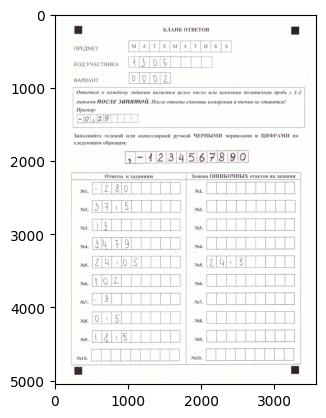

In [2]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
# 1) Считать исходное изображение
img = cv2.imread('aligned_form.jpg')  # Замените на ваш путь
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 2) Предобработка: например, слегка размыть (если есть шум) и получить бинарное изображение
gray_blur = cv2.GaussianBlur(gray, (5, 5), 0)
_, thresh = cv2.threshold(gray_blur, 150, 255, cv2.THRESH_BINARY_INV)

# 3) Получить границы (Canny) - можно на бинарном или на исходном сером
edges = cv2.Canny(thresh, 50, 150, apertureSize=3)

# 4) Использовать преобразование Хафа для поиска прямых
lines = cv2.HoughLines(edges, 1, np.pi / 180, 200)  # Параметры подбирайте под своё изображение
# visualize lines
# for line in lines:
#     rho, theta = line[0]
#     a = np.cos(theta)
#     b = np.sin(theta)
#     x0 = a*rho
#     y0 = b*rho
#     x1 = int(x0 + 1000*(-b))
#     y1 = int(y0 + 1000*(a))
#     x2 = int(x0 - 1000*(-b))
#     y2 = int(y0 - 1000*(a))
#     cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)

# 5) Найти средний угол тех линий, которые ближе всего к горизонтали
angles = []
if lines is not None:
    for line in lines:
        rho, theta = line[0]
        # theta = 0 или theta = pi ~ горизонтальная линия (но в реальности бывают небольшие отклонения)
        # Угол отклонения от горизонтали = theta - pi/2 (или что-то в таком духе, зависит от ориентации)
        # Но проще рассматривать именно угол, близкий к 0 или pi:
        #     горизонтальные линии будут иметь theta близкий к 0 или pi,
        #     вертикальные — к pi/2 (90 градусов).
        
        # Приведём theta к диапазону [-pi/2, pi/2], чтобы было легче интерпретировать
        # Можно так:
        angle_deg = (theta * 180 / np.pi) - 90
        print(angle_deg)
        # Или другой вариант вычисления, если линии находятся ближе к 0 или 180
        # angle_deg = theta * 180/np.pi, а потом приводить к диапазону

        # Проверяем, что угол близок к горизонтали
        # (например, |угол - 0| < 10° или |угол - 180| < 10°)
        # но часто проще собрать ВСЕ углы, а потом взять моду (самый частый)
        if abs(angle_deg) < 10:
            angles.append(angle_deg)

# Если линии нашлись, то берём медиану (или среднее) как «итоговый» угол
if len(angles) > 0:
    median_angle = np.median(angles)
else:
    median_angle = 0  # если ничего не нашлось

print(f"Наклон (в градусах): {median_angle}")

# 6) Повернуть изображение на найденный угол в обратную сторону
(h, w) = img.shape[:2]
center = (w // 2, h // 2)

# Формируем матрицу поворота (обратите внимание: угол поворота берём *-1)
M = cv2.getRotationMatrix2D(center, -median_angle, 1.0)

# Поворачиваем изображение
rotated = cv2.warpAffine(img, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)

plt.imshow(rotated)
plt.show()


In [21]:
rotated.shape


(5051, 3571, 3)

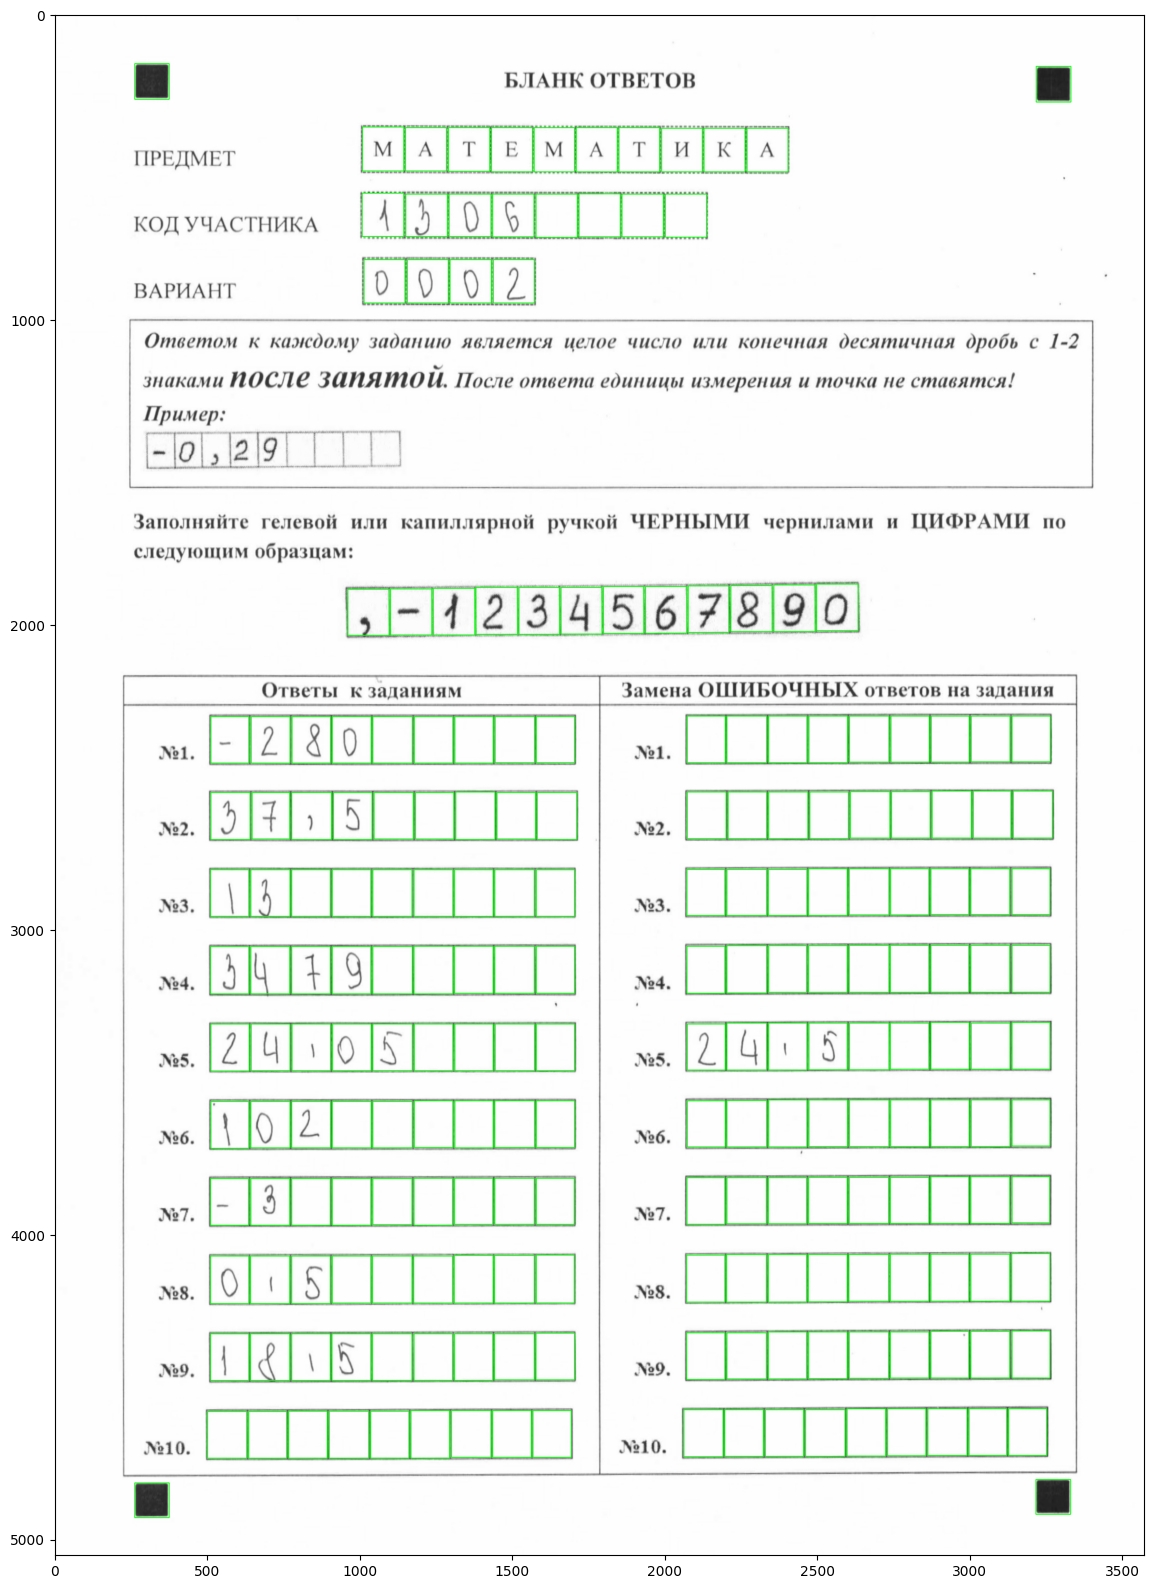

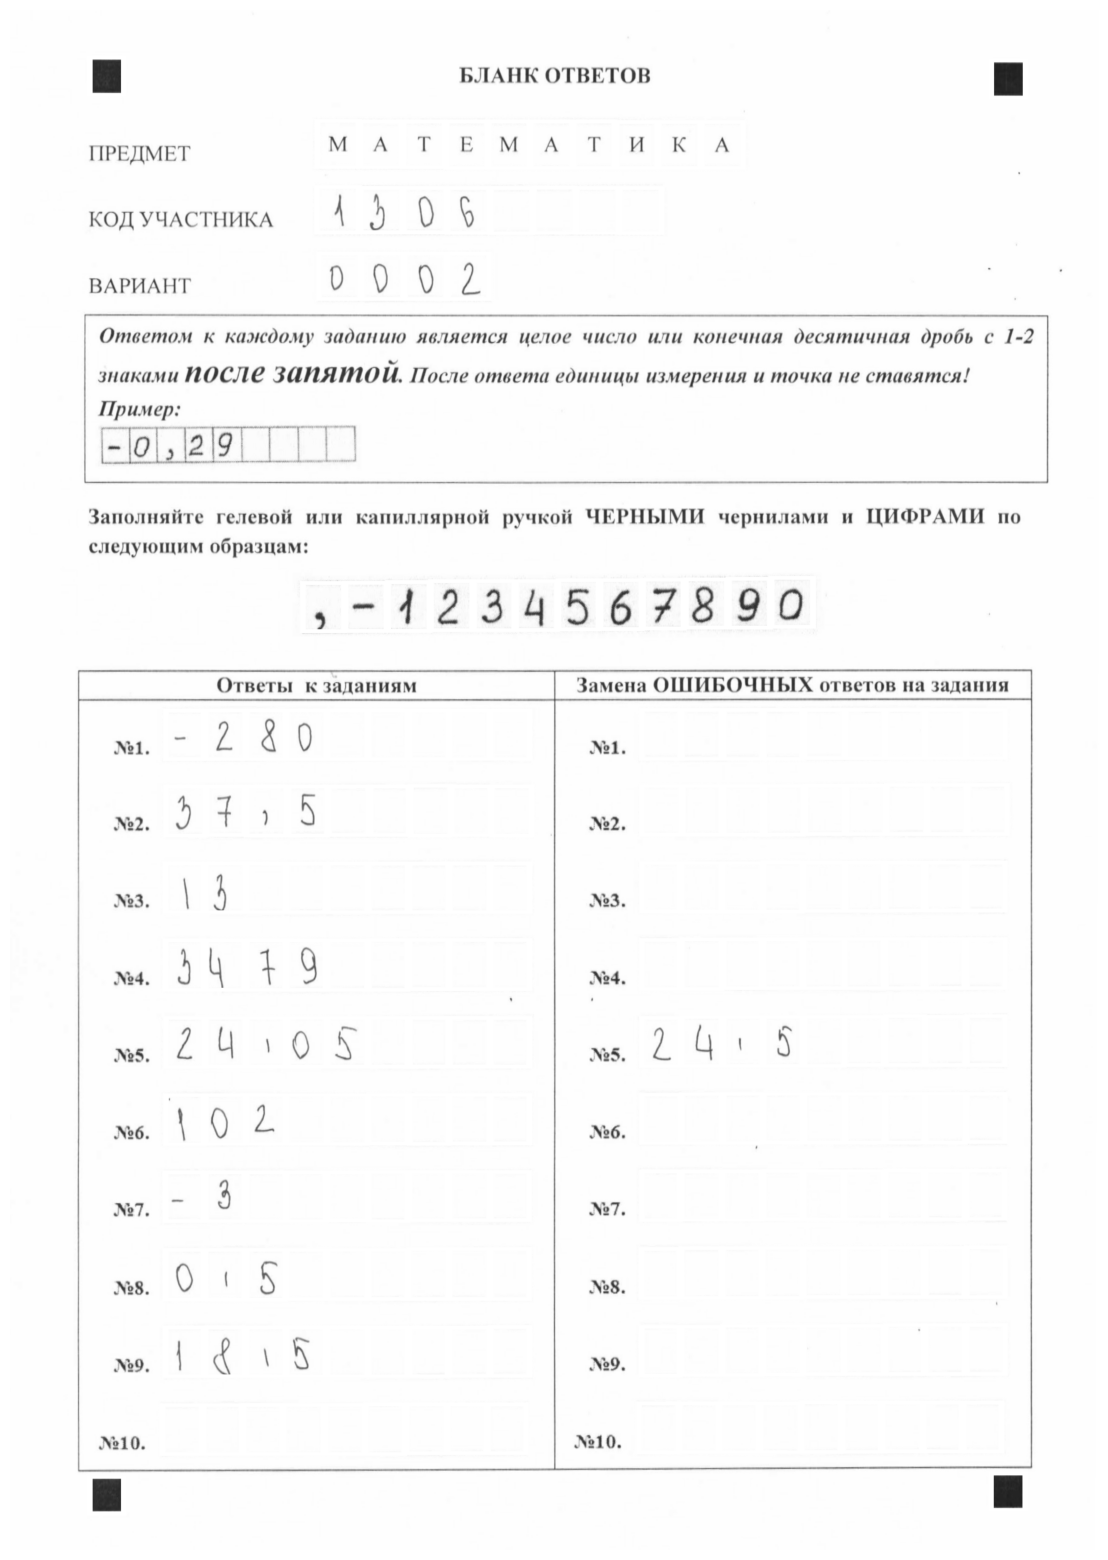

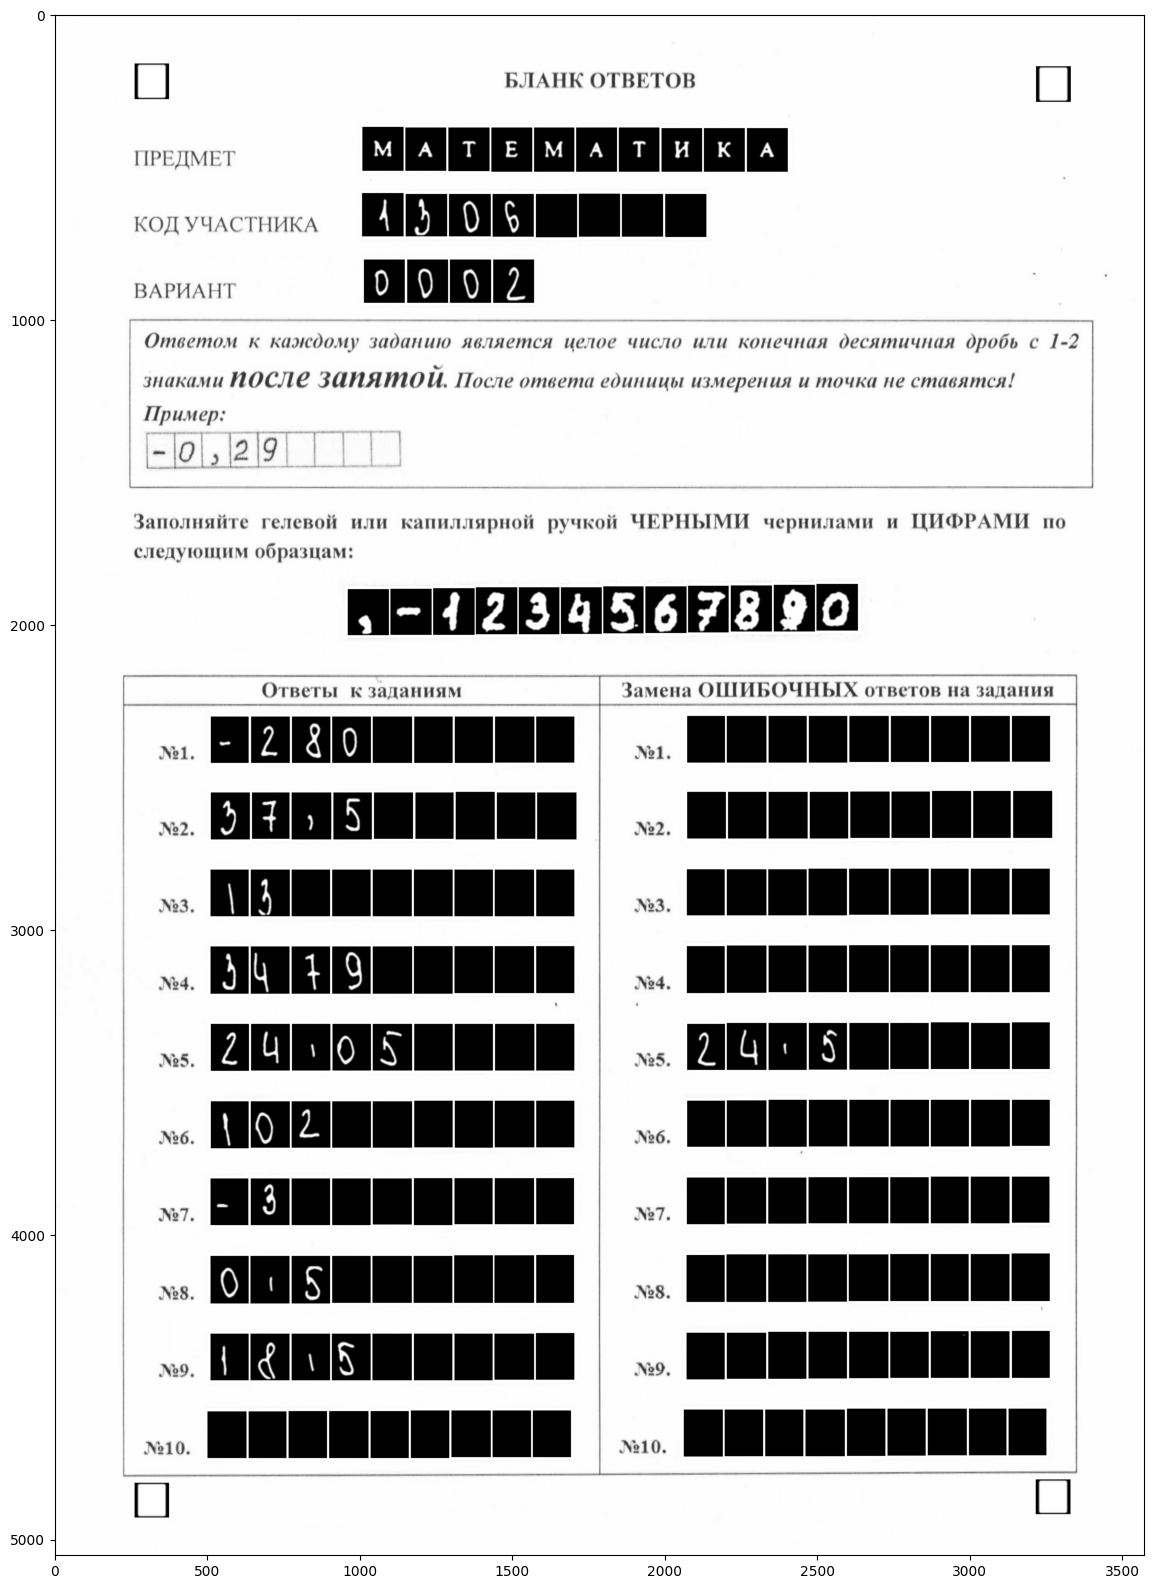

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Загрузка изображения
# image_path = "aligned_form.jpg"
# image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
image = rotated.copy()
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Попробуем улучшить детекцию, используя известные размеры ячеек
cell_w, cell_h = 126, 154
_, thresh = cv2.threshold(image, 200, 255, cv2.THRESH_BINARY_INV)

blurred = cv2.GaussianBlur(thresh, (5, 5), 0)

# Используем морфологические операции для лучшего выделения ячеек
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
processed = cv2.morphologyEx(blurred, cv2.MORPH_CLOSE, kernel, iterations=3)

# Повторное нахождение контуров
contours, _ = cv2.findContours(processed, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=lambda x: x[0][0][1])
contours = sorted(contours, key=lambda x: x[0][0][0])
contours = sorted(contours, key=lambda c: (cv2.boundingRect(c)[1], cv2.boundingRect(c)[0]))

# Фильтрация контуров с учетом известных размеров ячеек
cells = []
tolerance = 1000  # Допуск в размере
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    if 100 < w < 150 and 100 < h < 200:  # Подстраивайте размеры под бланк
        cells.append((x, y, w, h))
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Сортируем ячейки по расположению сверху вниз, затем слева направо
cells = sorted(cells, key=lambda b: (b[1], b[0]))

# Отображение найденных ячеек
image_with_boxes = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
for (x, y, w, h) in cells:
    cv2.rectangle(image_with_boxes, (x, y), (x + w, y + h), (0, 255, 0), 2)

plt.figure(figsize=(15, 20))
plt.imshow(image_with_boxes)
plt.show()

image_with_boxes = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
for (x, y, w, h) in cells:
    scale = 10
    scale_2 = 10
    scale_3 = 3
    scale_4 = 10
    image_with_boxes[y - scale : y + scale_3, x - scale_2 : x + w + scale_2] = 255 # нижняя горизонтальная линия
    image_with_boxes[y + h - scale_3 : y + h + scale, x - scale_2 : x + w + scale_2] = 255 # верхняя горизонтальная лини
    image_with_boxes[y - scale_2 : y + h + scale_2, x - scale_4 : x + scale_4] = 255 # левая вертикальная линия
    image_with_boxes[y - scale_2 : y + h + scale_2, x + w - scale_4 : x + w + scale_4] = 255 # правая вертикальная линия

# Визуализация результата
plt.figure(figsize=(15, 20))
plt.imshow(image_with_boxes)
plt.axis("off")
plt.show()


# now i want to binarize every cell on original image
for (x, y, w, h) in cells:
    cell_image = image_with_boxes[y:y+h, x:x+w]
    _, cell_image_bin = cv2.threshold(cell_image, 245, 255, cv2.THRESH_BINARY_INV)
    # remove small white points
    kernel = np.ones((3, 3), np.uint8)
    eroded = cv2.erode(cell_image_bin, kernel, iterations=1)
    image_denoised = cv2.medianBlur(eroded, 9)
    blurred = cv2.GaussianBlur(image_denoised, (9, 9), 0)
    image_with_boxes[y:y+h, x:x+w] = blurred

plt.figure(figsize=(15, 20))
plt.imshow(image_with_boxes)
plt.show()


# Вывод координат ячеек
df_cells = pd.DataFrame(cells, columns=["x", "y", "w", "h"])




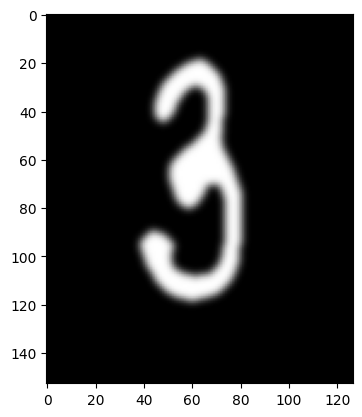

Предсказанная цифра: 3


'3'

In [6]:
from transformers import CLIPProcessor, CLIPModel, CLIPVisionModel
from PIL import Image
import torch

device = torch.device("cpu")
# Загружаем видовую модель, обученную для MNIST (весы для vision части)
vision_model = CLIPVisionModel.from_pretrained('tanganke/clip-vit-base-patch32_mnist').to(device)

# Загружаем оригинальный CLIP-модель (мультимодальную)
clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32").to(device)

# Подгружаем веса видовой модели (MNIST) в multimodal модель CLIP
clip_model.vision_model.load_state_dict(vision_model.vision_model.state_dict())

# Определяем текстовые метки для цифр от 1 до 9
labels = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "-", ".", ","]

# Загружаем процессор для корректной предобработки изображений и текстов
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

def predict_digit(image, labels):
# Обрабатываем изображение и текстовые метки.
# Процессор создаст словарь с ключом "pixel_values" для изображения и "input_ids"/"attention_mask" для текста.
    inputs = processor(text=labels, images=image, return_tensors="pt", padding=True)

    # Получаем выходы модели без вычисления градиентов
    with torch.no_grad():
        outputs = clip_model(**inputs)
        # logits_per_image — это матрица сходства между изображением и каждым из текстовых описаний.
        logits_per_image = outputs.logits_per_image  # размер: (1, число меток)
        # Преобразуем логиты в вероятности по меткам.
        probs = logits_per_image.softmax(dim=1)

    # Определяем индекс метки с наибольшей вероятностью
    pred_idx = probs.argmax(dim=1).item()
    predicted_digit = labels[pred_idx]

    print("Предсказанная цифра:", predicted_digit)
    return predicted_digit


x, y, w, h = cells[158]
cell_image = image_with_boxes[y:y+h, x:x+w]
image = cv2.cvtColor(cell_image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

predict_digit(image, labels)

In [ ]:
def predict_digit(image, labels):
# Обрабатываем изображение и текстовые метки.
# Процессор создаст словарь с ключом "pixel_values" для изображения и "input_ids"/"attention_mask" для текста.
    inputs = processor(text=labels, images=image, return_tensors="pt", padding=True)

    # Получаем выходы модели без вычисления градиентов
    with torch.no_grad():
        outputs = clip_model(**inputs)
        # logits_per_image — это матрица сходства между изображением и каждым из текстовых описаний.
        logits_per_image = outputs.logits_per_image  # размер: (1, число меток)
        # Преобразуем логиты в вероятности по меткам.
        probs = logits_per_image.softmax(dim=1)

    # Определяем индекс метки с наибольшей вероятностью
    pred_idx = probs.argmax(dim=1).item()
    predicted_digit = labels[pred_idx]

    print("Предсказанная цифра:", predicted_digit)
    return predicted_digit


In [130]:
logits_per_image

tensor([[18.7935, 19.6193, 19.7685, 18.9411, 17.3394, 17.6531, 17.9209, 17.7486,
         17.6282, 17.8281, 18.2480, 18.7997]])

In [134]:
cell_image.sum()

0

In [20]:
# labels = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "empty", "letter", "dot", "comma", "minus"]
# for cell in cells:
#     x, y, w, h = cell
#     cell_image = image_with_boxes[y:y+h, x:x+w]
#     # cell_image = cv2.resize(cell_image, (128, 128))
#     # if we have black background, we need to remove it
#     # if np.mean(cell_image) < 100:
#     #     cell_image = 255 - cell_image
#     if cell_image.sum() > 0:
#         image = cv2.cvtColor(cell_image, cv2.COLOR_BGR2RGB)
#         plt.imshow(image)
#         plt.show()
#         predict_digit(image, labels)

In [11]:
# i = 0
# for cell in cells:
#     i += 1
#     print(i)
#     x, y, w, h = cell
#     cell_image = image_with_boxes[y:y+h, x:x+w]
#     plt.imshow(cell_image)
#     plt.show()




In [23]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
from PIL import Image
import requests

x, y, w, h = cells[158]
cell_image = image_with_boxes[y:y+h, x:x+w]
image = cv2.cvtColor(cell_image, cv2.COLOR_BGR2RGB)
processor = TrOCRProcessor.from_pretrained('fhswf/TrOCR_Math_handwritten')
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = VisionEncoderDecoderModel.from_pretrained('fhswf/TrOCR_Math_handwritten').to(device)

Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 1024,
  "image_size": 384,
  "initializer_range": 0.02,
  "intermediate_size": 4096,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 16,
  "num_channels": 3,
  "num_hidden_layers": 24,
  "patch_size": 16,
  "qkv_bias": false,
  "transformers_version": "4.48.1"
}

Config of the decoder: <class 'transformers.models.trocr.modeling_trocr.TrOCRForCausalLM'> is overwritten by shared decoder config: TrOCRConfig {
  "activation_dropout": 0.0,
  "activation_function": "relu",
  "add_cross_attention": true,
  "attention_dropout": 0.0,
  "bos_token_id": 0,
  "classifier_dropout": 0.0,
  "d_model": 1024,
  "decoder_attention_heads": 16,
  "decoder_ffn_dim": 4096,
  "decoder_layerdrop": 0.0,
  "decoder_layers":

In [28]:
def predict_digit_trocr(image):
    pixel_values = processor(images=image, return_tensors="pt").pixel_values.to(device)
    generated_ids = model.generate(pixel_values)
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
    return generated_text


In [29]:
generated_text

'3'

In [2]:
# labels = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "empty", "letter", "dot", "comma", "minus"]
# for cell in cells:
#     x, y, w, h = cell
#     cell_image = image_with_boxes[y:y+h, x:x+w]
#     # cell_image = cv2.resize(cell_image, (128, 128))
#     # if we have black background, we need to remove it
#     # if np.mean(cell_image) < 100:
#     #     cell_image = 255 - cell_image
#     if cell_image.sum() > 0:
#         image = cv2.cvtColor(cell_image, cv2.COLOR_BGR2RGB)
#         image = cv2.resize(image, (32, 32))
#         plt.imshow(image)
#         plt.show()
#         print(predict_digit_trocr(image))
